In [27]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [28]:
# load data
data=pd.read_csv('OH-methanol_kT_data_csv.csv')
data

,"Temperature, T (Kelvin)","Rate constant, k (cm^3 mol^-1 s^-1)",1/T,ln(k/(T^2.72))
0,240.0,6.570000e-13,0.004167,-42.958430
1,296.0,8.610000e-13,0.003378,-43.258460
2,350.0,1.250000e-12,0.002857,-43.341456
3,400.0,1.410000e-12,0.002500,-43.584215
4,440.0,1.620000e-12,0.002273,-43.704622
...,...,...,...,...
86,465.0,1.350000e-12,0.002151,-44.037258
87,570.0,2.060000e-12,0.001754,-44.168446
88,597.0,2.670000e-12,0.001675,-44.034957
89,669.0,2.790000e-12,0.001495,-44.300712


In [ ]:
# load feature variable x and target variable y
X = data.iloc[:,2]
y = data.iloc[:,3]

# show variable shapes
print(f'X.shape {X.shape}   y.shape {y.shape}')

X.shape (91,)   y.shape (91,)


In [30]:
# split data into training, cross-validation, and test set
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.40, random_state=29)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp,y_temp,test_size=0.50, random_state=29)

# show training, cross-validation, and test set shape
print(f'X_train.shape {X_train.shape}   y_train.shape {y_train.shape}')
print(f'X_cv {X_cv.shape}   y_cv {y_cv.shape}')
print(f'X_test {X_test.shape}   y_test {y_test.shape}')


X_train.shape (54,)   y_train.shape (54,)
X_cv (18,)   y_cv (18,)
X_test (19,)   y_test (19,)


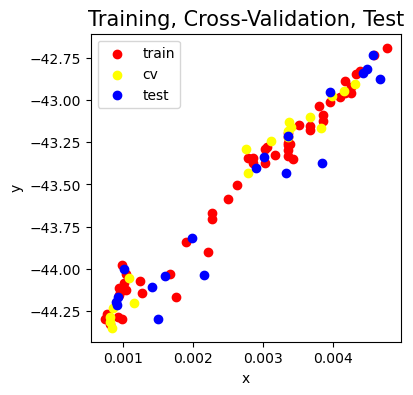

In [32]:
# plot data sets
fig, ax = plt.subplots(1,1,figsize=(4,4))
#ax.plot(X_actual, y_actual, '--', color = 'orangered',label='y_actual', lw=1)
ax.set_title('Training, Cross-Validation, Test', fontsize=15)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.scatter(X_train,y_train,color = 'red', label='train')
ax.scatter(X_cv,y_cv,color = 'yellow', label='cv')
ax.scatter(X_test,y_test,color = 'blue', label='test')
ax.legend(loc='upper left')
plt.show()